# PROJECT: WRITE A DATA SCIENCE BLOG POST

The current project at Udacity is about analyzing AirBnB data for Seattle and writing a blog article based on my analysis. In the following I describe my approach to the task.

## Approach

1. *Gathering* the data as a basis for our analysis
2. Visual and programmatic *Assessment* of the dataset to get an overview
3. Data *Cleaning and preparation* to prepare the existing data for later processing 
   - Delete missing or unnecessary information
   - Change data types
   - Imputing missing values
4. *Analysis* to find out trends and correlations. Also predicting an model by machine learning
5. *Conclusion*

In [1]:
# Import necessary packages

import numpy as np
import pandas as pd

## Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Gathering Data

In [2]:
# Read listings dataset
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Shape of listings DataFrame
df_listings.shape

(3818, 92)

In [4]:
print('The dataset "listings.csv" contains information about %d listings saved in %d variables by %d hosts.' % (df_listings.shape[0], df_listings.shape[1], len(df_listings['host_id'].unique())))

The dataset "listings.csv" contains information about 3818 listings saved in 92 variables by 2751 hosts.


In [5]:
# Read calendar dataset
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
print('The dataset "calendar.csv" contains information about %d unique listings from %s to %s.' % (df_calendar['listing_id'].nunique(), df_calendar['date'].min(), df_calendar['date'].max()))

The dataset "calendar.csv" contains information about 3818 unique listings from 2016-01-04 to 2017-01-02.


In [7]:
# Read reviews.csv dataset
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
print('The dataset "reviews.csv" contains information about %d unique listings by %d unique reviewers.' % (df_reviews['listing_id'].nunique(), df_reviews['reviewer_id'].nunique()))

The dataset "reviews.csv" contains information about 3191 unique listings by 75730 unique reviewers.


## Assessing Data

### `df_listings`

In [9]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
# Look for duplicated values
df_listings[df_listings.duplicated()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [11]:
# Missing values in %
df_listings.isnull().mean().sort_values(ascending=False)

license             1.000000
square_feet         0.974594
monthly_price       0.602672
security_deposit    0.511262
weekly_price        0.473808
                      ...   
room_type           0.000000
accommodates        0.000000
bed_type            0.000000
amenities           0.000000
longitude           0.000000
Length: 92, dtype: float64

In [12]:
print('The dataset "listings.csv" has %d missing values in %d column/s.' % (df_listings.isnull().sum().sum(), df_listings.columns[df_listings.isnull().any()].shape[0]))

The dataset "listings.csv" has 29819 missing values in 45 column/s.


In [13]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### `df_calendar`

In [14]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [15]:
# Look for duplicates
df_calendar[df_calendar.duplicated()]

,listing_id,date,available,price


In [16]:
# Missing values in %
df_calendar.isnull().mean().sort_values(ascending=False)

price         0.32939
listing_id    0.00000
date          0.00000
available     0.00000
dtype: float64

In [17]:
print('The dataset "calendar.csv" has %d missing values in %d column/s.' % (df_calendar.isnull().sum().sum(), df_calendar.columns[df_calendar.isnull().any()].shape[0]))

The dataset "calendar.csv" has 459028 missing values in 1 column/s.


In [18]:
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


### Issues

**Quality**
- Several columns with missing values

**Tidyness**
- Listings and calendar are in two tables, only one is necessary
- Several superfluous columns
- The file format of various columns is not correct
  - Boolean values must be reformatted
  - Date are not date formats

## Cleaning & Data Preparation

In [19]:
# Copy dataframes to not change original ones
listings_clean = df_listings.copy()
calendar_clean = df_calendar.copy()

### Merge datasets

**Define** <br>
The two DataFrames `df_listings` and `df_calendar` are merged into one using the listings ID.

**Code**

In [20]:
# Rename id column for merging
listings_clean = listings_clean.rename(index=str, columns={"id": "listing_id"})

In [21]:
df_clean = pd.merge(calendar_clean, listings_clean, on = 'listing_id')

**Test**

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 95 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   listing_id                        1393570 non-null  int64  
 1   date                              1393570 non-null  object 
 2   available                         1393570 non-null  object 
 3   price_x                           934542 non-null   object 
 4   listing_url                       1393570 non-null  object 
 5   scrape_id                         1393570 non-null  int64  
 6   last_scraped                      1393570 non-null  object 
 7   name                              1393570 non-null  object 
 8   summary                           1328965 non-null  object 
 9   space                             1185885 non-null  object 
 10  description                       1393570 non-null  object 
 11  experiences_offered               139

### Drop unnecessary columns

**Define** <br>
Many columns contain values that are not necessary for our further analysis because they do not contain relevant information. What remains is a data set with relevant columns.

**Code**

In [23]:
df_clean = df_clean[['listing_id', 'price_x', 'host_response_rate', 'host_response_time', 'host_is_superhost', 'host_listings_count', 'zipcode', 'property_type','room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy', 'reviews_per_month']]

**Test**

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   listing_id            1393570 non-null  int64  
 1   price_x               934542 non-null   object 
 2   host_response_rate    1202675 non-null  object 
 3   host_response_time    1202675 non-null  object 
 4   host_is_superhost     1392840 non-null  object 
 5   host_listings_count   1392840 non-null  float64
 6   zipcode               1391015 non-null  object 
 7   property_type         1393205 non-null  object 
 8   room_type             1393570 non-null  object 
 9   accommodates          1393570 non-null  int64  
 10  bathrooms             1387730 non-null  float64
 11  bedrooms              1391380 non-null  float64
 12  beds                  1393205 non-null  float64
 13  number_of_reviews     1393570 non-null  int64  
 14  review_scores_rating  1157415 non-

In [25]:
df_clean.nunique()

listing_id              3818
price_x                  669
host_response_rate        45
host_response_time         4
host_is_superhost          2
host_listings_count       27
zipcode                   28
property_type             16
room_type                  3
accommodates              15
bathrooms                 12
bedrooms                   8
beds                      11
number_of_reviews        195
review_scores_rating      42
cancellation_policy        3
reviews_per_month        654
dtype: int64

### Convert columns to correct format

**Define** <br>
Some columns are not available in a format that can be used later. `price_x` and `host_response_rate` are numeric values, but stored as strings. The corresponding columns are reformatted

**Code**

In [26]:
# Date to datetime
#date_col = ['date', 'host_since']

#for col in date_col:
#    df_clean[col] = pd.to_datetime(df_clean[col])

In [27]:
# `price_x` and `host_response_rate` col to float
df_clean.price_x = df_clean.price_x.str.replace('[$, ]', '').astype(float)
df_clean.host_response_rate = df_clean.host_response_rate.str.replace('%', '').astype(float)/100


/tmp/ipykernel_3759/1775123509.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean.price_x = df_clean.price_x.str.replace('[$, ]', '').astype(float)


In [28]:
# Define fuction to convert response_time to int 
def response_time_calc(var):
    if var == 'within an hour':
        var = '1'
    elif var == 'within a few hours':
        var = '3'
    elif var == 'within a day':
        var = '24'
    elif var == 'a few days or more':
        var = '48'
    else:
        var = '96'
        
    return int(var)

# `host_response_time` to var
df_clean.host_response_time = df_clean.host_response_time.apply(response_time_calc)

**Test**

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   listing_id            1393570 non-null  int64  
 1   price_x               934542 non-null   float64
 2   host_response_rate    1202675 non-null  float64
 3   host_response_time    1393570 non-null  int64  
 4   host_is_superhost     1392840 non-null  object 
 5   host_listings_count   1392840 non-null  float64
 6   zipcode               1391015 non-null  object 
 7   property_type         1393205 non-null  object 
 8   room_type             1393570 non-null  object 
 9   accommodates          1393570 non-null  int64  
 10  bathrooms             1387730 non-null  float64
 11  bedrooms              1391380 non-null  float64
 12  beds                  1393205 non-null  float64
 13  number_of_reviews     1393570 non-null  int64  
 14  review_scores_rating  1157415 non-

### Filling in missing values

**Define** <br>
Missing values are either removed or filled in. 

For the room types, the mode is suitable, because you can not make an average of it. For columns where few numerical values are missing, missing values are filled with the average. 

**Code**

In [30]:
# Fill NaN values in rooms columns with mode
rooms_nan = ['bedrooms', 'bathrooms', 'beds']

for col in rooms_nan:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

In [31]:
# Fill NaN values in review/listings columns with mean
col_nan = ['host_listings_count', 'host_response_rate', 'host_response_time','review_scores_rating']

for col in col_nan:
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

**Test**

In [32]:
df_clean.isnull().mean().sort_values(ascending=False)

price_x                 0.329390
reviews_per_month       0.164222
zipcode                 0.001833
host_is_superhost       0.000524
property_type           0.000262
bedrooms                0.000000
cancellation_policy     0.000000
review_scores_rating    0.000000
number_of_reviews       0.000000
beds                    0.000000
listing_id              0.000000
bathrooms               0.000000
accommodates            0.000000
host_listings_count     0.000000
host_response_time      0.000000
host_response_rate      0.000000
room_type               0.000000
dtype: float64

### Change boolean string (t/f) to boolean value 

**Define** <br>
Various columns are boolean values, but with a format (t/f) that Pandas cannot work with. Therefore I reformat them to make calculations based on them.

**Code**

In [33]:
# Define function to correct boolean values
def bool_correction(var):
    if var == 'f':
        var = var.replace('f','0')
    elif var ==' t':
        var = var.replace('t','1')
    else:
        var = '0'
    return int(var)

In [34]:
# Change values
for col in df_clean.columns:
    if set(df_clean[col]) == {'t','f'}:
        df_clean[col] = df_clean[col].apply(bool_correction)
        
    elif set(df_clean[col]) == {'t','f', np.nan}:
        df_clean[col] = df_clean[col].apply(bool_correction)

In [35]:
df_clean['host_is_superhost'] = df_clean['host_is_superhost'].astype('bool')

**Test**

In [36]:
df_clean.nunique()

listing_id              3818
price_x                  669
host_response_rate        46
host_response_time         5
host_is_superhost          1
host_listings_count       28
zipcode                   28
property_type             16
room_type                  3
accommodates              15
bathrooms                 12
bedrooms                   8
beds                      11
number_of_reviews        195
review_scores_rating      43
cancellation_policy        3
reviews_per_month        654
dtype: int64

In [37]:
df_clean.isnull().mean().sort_values(ascending=False)

price_x                 0.329390
reviews_per_month       0.164222
zipcode                 0.001833
property_type           0.000262
bathrooms               0.000000
cancellation_policy     0.000000
review_scores_rating    0.000000
number_of_reviews       0.000000
beds                    0.000000
bedrooms                0.000000
listing_id              0.000000
accommodates            0.000000
host_listings_count     0.000000
host_is_superhost       0.000000
host_response_time      0.000000
host_response_rate      0.000000
room_type               0.000000
dtype: float64

### Remove NaN

**Define** <br>
Since we later use `price_x` as a response variable, all NaN values are dropped from this column and the whole dataset.
All remaining NaN values are also being dropped because of the low count.

**Code**

In [38]:
# Drop NaN values in `price_x` column
df_clean = df_clean.dropna(subset=['price_x'])

In [39]:
# Remove remaining NaN values
df_clean = df_clean.dropna(axis=0, how='any')

**Test**

In [40]:
# Sum up all NaN values remaining
df_clean.isnull().sum().sum()

0

In [41]:
df_clean.shape

(793931, 17)

## Analysis

### Visualizations

#### 1. In what range are the listings prices distributed?


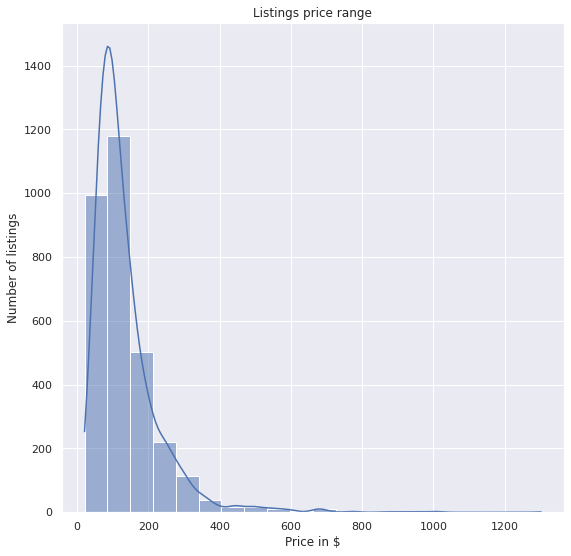

In [77]:
# Histogram of price
sns.histplot(data=df_clean.groupby('listing_id').mean()['price_x'], bins=20, kde=True)
plt.xlabel('Price in $')
plt.ylabel('Number of listings')
plt.title('Listings price range')
plt.savefig('listings_price_range');

In [43]:
print('The prices of all listings range between %.2f $ and %.2f $ a day with an average price of %.2f $.' % (df_clean['price_x'].min(), df_clean['price_x'].max(), df_clean['price_x'].mean()))

The prices of all listings range between 10.00 $ and 1650.00 $ a day with an average price of 137.82 $.


As you can see on the graph, most of the listings' prices are spread out in the $50-$200 range. There are also outliers up and down, but they are quite few.

#### 2. How does the listings price correlate with other numerical variables?

In [44]:
# Select only numerical variables
num_vars = df_clean.select_dtypes(exclude=['object', 'bool']).copy().columns

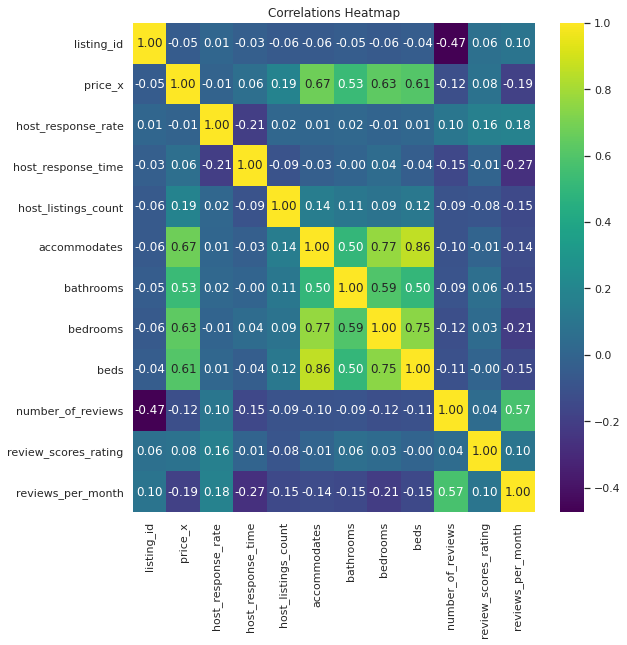

In [45]:
# Draw correlation heatmap
corrs = np.corrcoef(df_clean[num_vars].values.T)
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(corrs, cmap='viridis', annot=True, fmt='.2f', xticklabels=num_vars, yticklabels=num_vars).set_title('Correlations Heatmap');

In particular, the accommodation, bathroom, bedroom and bed correlate with the price of the listing. There seems to be no relevant correlation with the number of reviews, the rating of them or the reviews per month.

#### 3. In what time frame do the hosts respond?

In [75]:
df_clean.host_response_time.value_counts()

1     381189
3     216206
24    121131
96     66239
48      9166
Name: host_response_time, dtype: int64

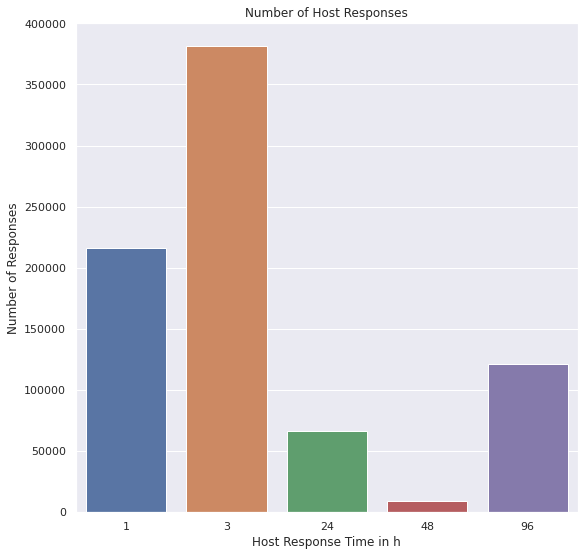

In [78]:
sns.barplot(x=df_clean.host_response_time.unique(), y=df_clean.host_response_time.value_counts())
plt.xlabel('Host Response Time in h')
plt.ylabel('Number of Responses')
plt.title('Number of Host Responses')
plt.savefig('host_responses_count');

Most hosts respond to requests in a timely manner. Few take more than a day or a few days, with some taking significantly longer to respond.

### Machine Learning

In [46]:
# Dummy the categorical variables
cat_vars = df_clean.select_dtypes(include=['object']).copy().columns
cat_vars

Index(['zipcode', 'property_type', 'room_type', 'cancellation_policy'], dtype='object')

In [47]:
for var in cat_vars:
    # for each cat add dummy var, drop original column
    df_clean = pd.concat([df_clean.drop(var, axis=1), pd.get_dummies(df_clean[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

In [48]:
# Split into explanatory and response variables
X = df_clean.drop(columns='price_x')
y = df_clean['price_x']

In [49]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
# Instantiate
lm_model = LinearRegression(normalize=True);

# Fit
lm_model.fit(X_train, y_train);

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [51]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [52]:
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [53]:
#Print training and testing score
print("The r^2 on the training data was {}.  The r^2 on the test data was {}.".format(train_score, test_score))

The r^2 on the training data was 0.6277481070461097.  The r^2 on the test data was 0.6290503391083058.


## Appendix

### I. Sources
- [Kaggle](https://www.kaggle.com/airbnb/seattle)  for the dataset
- Udacity with necessary code and knowledge
- Stackoverflow for [custom color palettes](https://stackoverflow.com/questions/50192121/custom-color-palette-intervals-in-seaborn-heatmap) and [approach to missing data](https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values)
